<a href="https://colab.research.google.com/github/nikhilsingh9216/Data-Analysis/blob/master/Number_Prediction_MNIST%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
#%maplotlib inline
import numpy as np

In [ ]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
x_train_flattened=x_train.reshape(len(x_train),x_train.shape[1]*x_train.shape[2])
x_test_flattened=x_test.reshape(len(x_test),x_test.shape[1]*x_test.shape[2])

In [ ]:
x_test_flattened.shape

(10000, 784)

In [ ]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')                 
                  
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4716 - accuracy: 0.8766
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3040 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2836 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2728 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2667 - accuracy: 0.9261


In [ ]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2698 - accuracy: 0.9248


[0.2698242664337158, 0.9247999787330627]

In [ ]:
y_predicted=model.predict(x_test_flattened)

In [ ]:
y_predicted

array([[2.72465646e-02, 5.56960742e-07, 7.51541257e-02, ...,
        9.99718904e-01, 1.17740899e-01, 6.72649562e-01],
       [3.82047832e-01, 1.03951097e-02, 9.99359012e-01, ...,
        6.29021954e-13, 1.21297568e-01, 2.09356821e-09],
       [3.59565020e-04, 9.94530022e-01, 6.26606524e-01, ...,
        1.05240166e-01, 4.11608934e-01, 3.70335877e-02],
       ...,
       [2.24603787e-06, 6.72148144e-06, 1.03941560e-03, ...,
        1.37089223e-01, 5.95336020e-01, 7.45514691e-01],
       [8.79960498e-05, 1.90377235e-04, 1.47283077e-04, ...,
        2.70920918e-05, 7.26586461e-01, 6.24636159e-05],
       [6.24114275e-03, 1.44727086e-09, 1.95849568e-01, ...,
        7.00199321e-09, 1.81049109e-04, 6.86330281e-07]], dtype=float32)

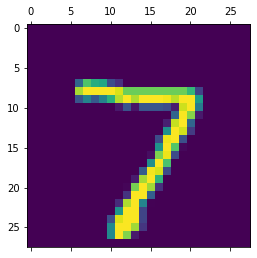

In [ ]:
plt.matshow(x_test[0])

In [ ]:
np.argmax(y_predicted[0])

7

In [ ]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]

In [ ]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

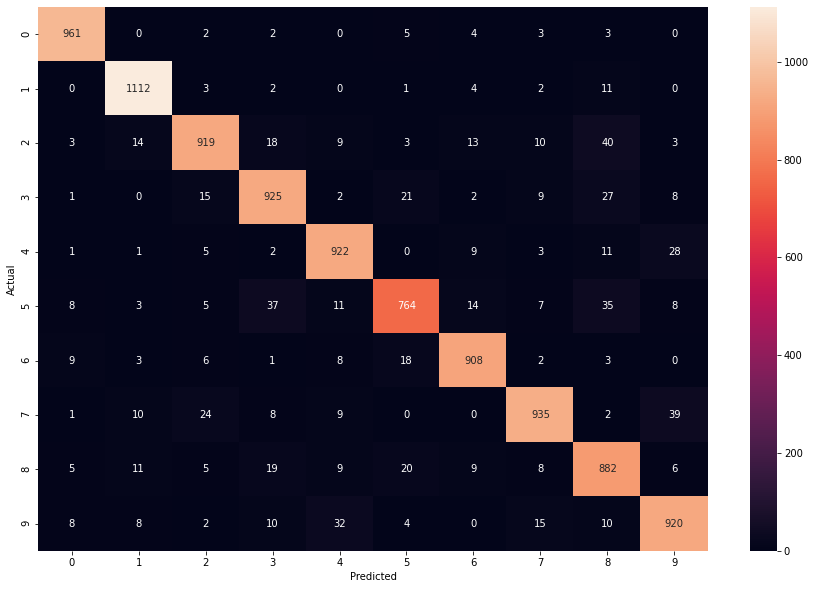

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'), 
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(100,activation='sigmoid')                                    

                  
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3017 - accuracy: 0.9148
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1196 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0843 - accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0642 - accuracy: 0.9794
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0506 - accuracy: 0.9836


In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0815 - accuracy: 0.9751


[0.08153923600912094, 0.9750999808311462]

In [ ]:
y_predicted=model.predict(x_test)

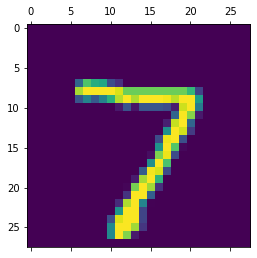

In [ ]:
plt.matshow(x_test[0])

In [ ]:
np.argmax(y_predicted[0])

7

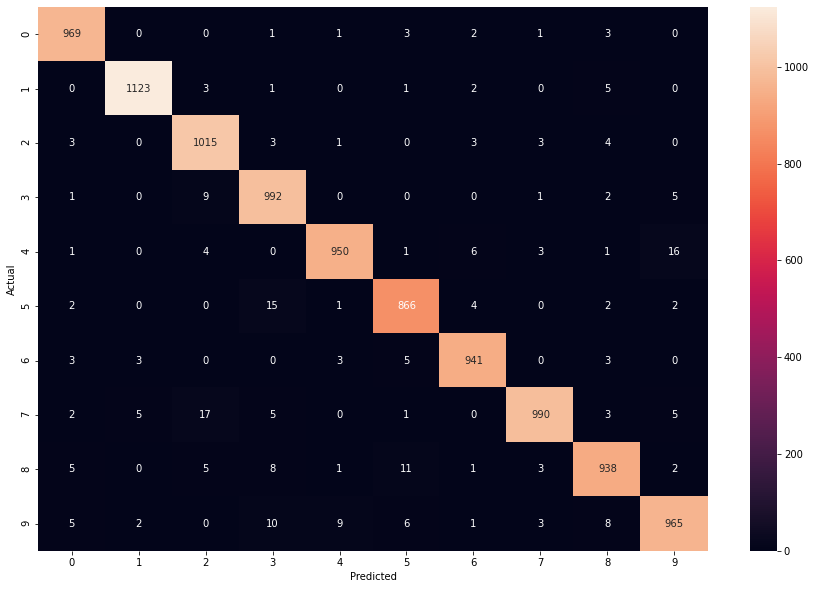

In [ ]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()